1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [5]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('whitegrid')

In [39]:
#### for reading stock datda from internet

#### from pandas.io import data, wb # becomes

import pandas_datareader as pdr

In [40]:
from datetime import datetime 

In [41]:
from __future__ import division

In [42]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [43]:
end = datetime.now()  #today's date

start = datetime(end.year-1,end.month,end.day)

In [47]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

In [51]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-09,94.290001,95.940002,93.930000,94.989998,44331200,93.426774
2016-02-10,95.919998,96.349998,94.099998,94.269997,42343600,92.718621
2016-02-11,93.790001,94.720001,92.589996,93.699997,50074700,92.158002
2016-02-12,94.190002,94.500000,93.010002,93.989998,40351400,92.443230
2016-02-16,95.019997,96.849998,94.610001,96.639999,49057900,95.049622


In [52]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,106.894664,107.788814,106.212885,107.070316,3.532467e+07,106.272008
std,8.832067,8.863153,8.933903,8.945718,1.511942e+07,9.343109
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,98.669998,99.349998,98.110001,98.779999,2.628200e+07,97.745922
50%,107.779999,108.750000,106.940002,107.930000,3.156190e+07,107.179719
75%,113.650002,114.339996,112.629997,113.550003,3.830350e+07,112.989884
max,131.350006,132.220001,131.220001,132.039993,1.146021e+08,132.039993


In [53]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-02-09 to 2017-02-08
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


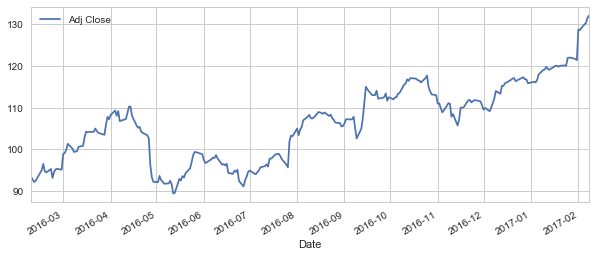

In [56]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

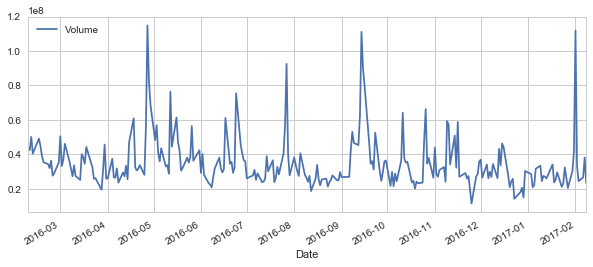

In [57]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [58]:
## Moving Averages

In [59]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/arnavsomani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/arnavsomani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/arnavsomani/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


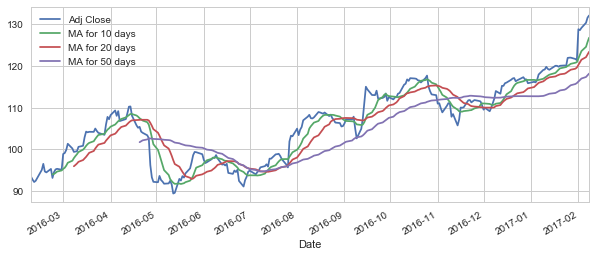

In [62]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [63]:
# Daily Returns

In [66]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

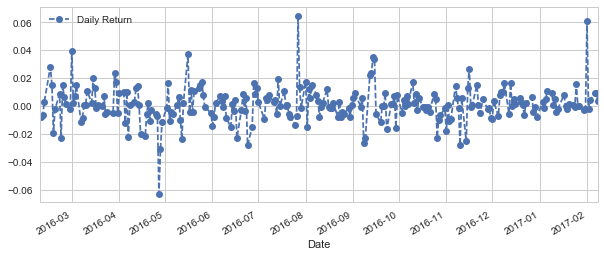

In [67]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [70]:
# Average Daily Return through seaborn

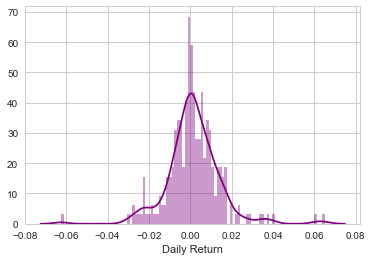

In [71]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [72]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2016-02-09,94.290001,95.940002,93.930000,94.989998,44331200,93.426774,NaN,NaN,NaN,NaN
2016-02-10,95.919998,96.349998,94.099998,94.269997,42343600,92.718621,NaN,NaN,NaN,-0.007580
2016-02-11,93.790001,94.720001,92.589996,93.699997,50074700,92.158002,NaN,NaN,NaN,-0.006046
2016-02-12,94.190002,94.500000,93.010002,93.989998,40351400,92.443230,NaN,NaN,NaN,0.003095
2016-02-16,95.019997,96.849998,94.610001,96.639999,49057900,95.049622,NaN,NaN,NaN,0.028195


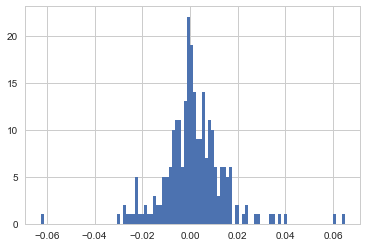

In [75]:
AAPL['Daily Return'].hist(bins=100)  #built histogram function 

In [76]:
# Analyze the returns the stock on our list 

In [77]:
closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

In [79]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-09,93.426774,482.070007,678.109985,47.963861
2016-02-10,92.718621,490.480011,684.119995,48.382377
2016-02-11,92.158002,503.820007,683.109985,48.362910
2016-02-12,92.443230,507.079987,682.400024,49.151279
2016-02-16,95.049622,521.099976,691.000000,50.082544


In [80]:
# Daily Return for all the stocks

In [83]:
tech_rets = closing_df.pct_change()

In [84]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-09,NaN,NaN,NaN,NaN
2016-02-10,-0.007580,0.017446,0.008863,0.008726
2016-02-11,-0.006046,0.027198,-0.001476,-0.000402
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947


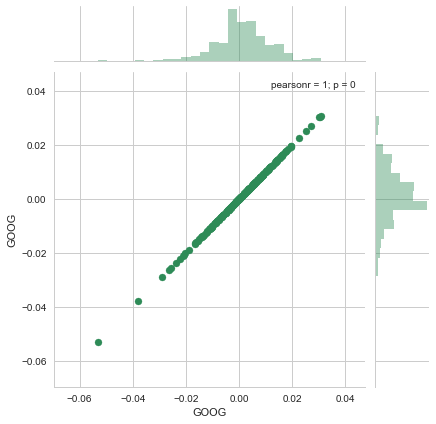

In [85]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

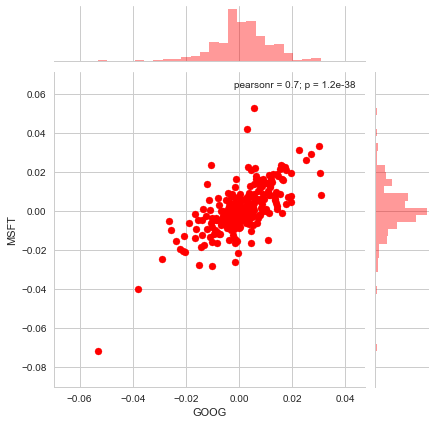

In [87]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')

In [88]:
# pearsonr = pearson product moment correlation coefficient 

In [89]:
# Comparision Analysis Plot 

In [90]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-09,NaN,NaN,NaN,NaN
2016-02-10,-0.007580,0.017446,0.008863,0.008726
2016-02-11,-0.006046,0.027198,-0.001476,-0.000402
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947


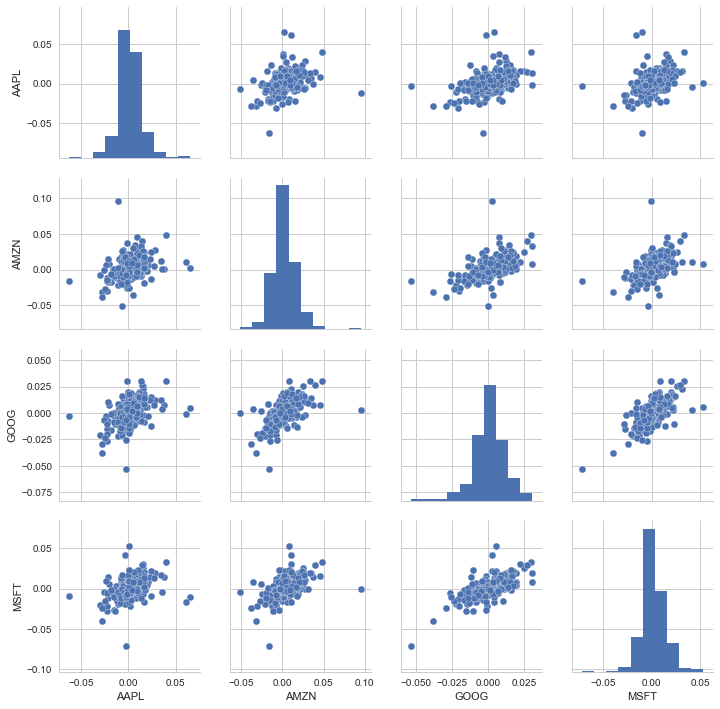

In [91]:
sns.pairplot(tech_rets.dropna())

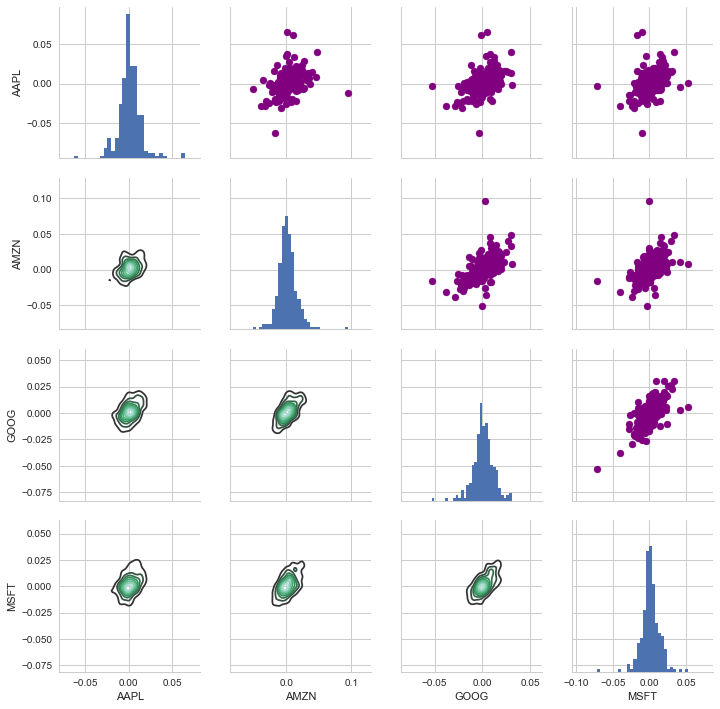

In [99]:
#can make customized comparsion

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool')
returns_fig.map_diag(plt.hist,bins=30)



In [100]:
# Correlation of the closing price

In [101]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-09,93.426774,482.070007,678.109985,47.963861
2016-02-10,92.718621,490.480011,684.119995,48.382377
2016-02-11,92.158002,503.820007,683.109985,48.362910
2016-02-12,92.443230,507.079987,682.400024,49.151279
2016-02-16,95.049622,521.099976,691.000000,50.082544


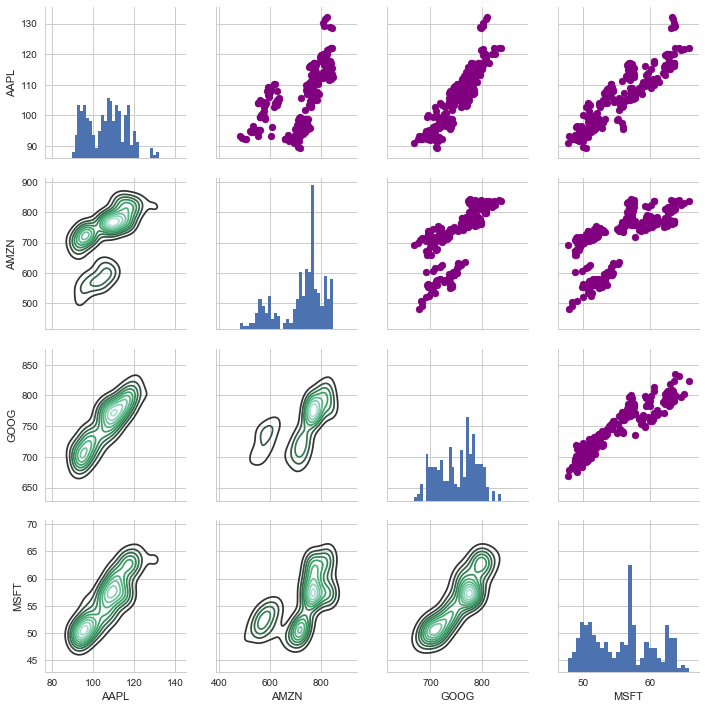

In [102]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,color='cool')
returns_fig.map_diag(plt.hist,bins=30)




In [103]:
# Correlation plot

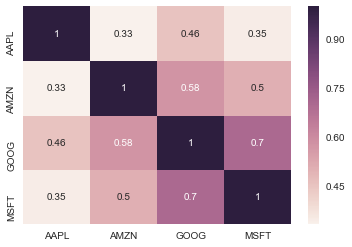

In [115]:
corrmat = tech_rets.corr()
sns.heatmap(corrmat,annot=True)

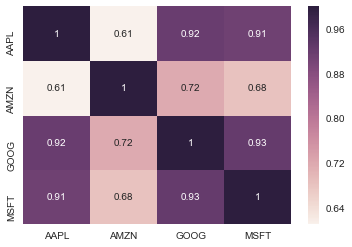

In [116]:
corrmat1 = closing_df.corr()
sns.heatmap(corrmat1,annot=True)

In [118]:


# RISK ANALYSIS



In [119]:
rets = tech_rets.dropna()

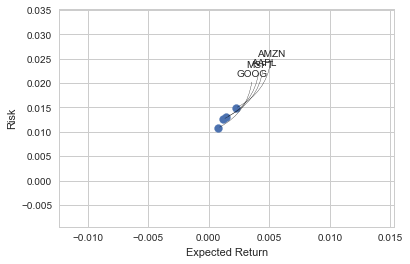

In [128]:
area = np.pi*20 # Area of the circles of the scatterplot

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):   #every column in rets where x = mean and y = std
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [126]:
# Value at Risk using 
#   1. Bootstrap method with Quantiles
#   2. Monte Carlo

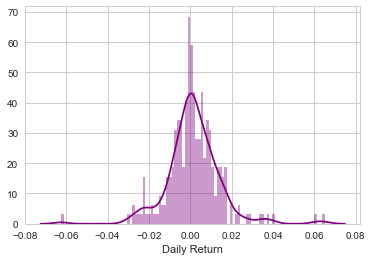

In [129]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [136]:
# Bootstrap
# Quantile to get the risk value
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-10,-0.007580,0.017446,0.008863,0.008726
2016-02-11,-0.006046,0.027198,-0.001476,-0.000402
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947
2016-02-17,0.015315,0.024947,0.025181,0.026032


In [137]:
rets.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-02-02,-0.001709,0.009131,0.003563,-0.006449
2017-02-03,0.004279,-0.035419,0.003707,0.008073
2017-02-06,0.009374,-0.003160,-0.000187,-0.000628
2017-02-07,0.009517,0.006018,0.007026,-0.003300
2017-02-08,0.003877,0.008874,0.001747,-0.001419


In [138]:
rets['AAPL'].quantile(0.05)

-0.020747924597211573

In [139]:

# MONTE CARLO


In [141]:
days = 365
dt=1/days
mu=rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [162]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [159]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-09,672.320007,699.900024,668.770020,678.109985,3608900,678.109985
2016-02-10,686.859985,701.309998,682.130005,684.119995,2638000,684.119995
2016-02-11,675.000000,689.349976,668.867981,683.109985,3024000,683.109985
2016-02-12,690.260010,693.750000,678.599976,682.400024,2141400,682.400024
2016-02-16,692.979980,698.000000,685.049988,691.000000,2520000,691.000000


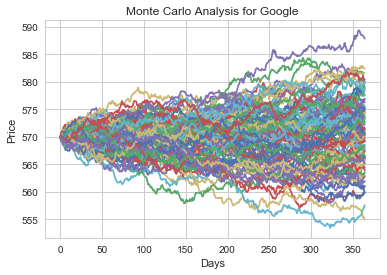

In [163]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')


In [171]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]

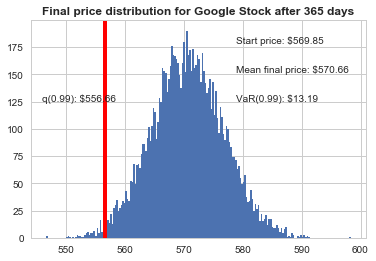

In [173]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');